<a href="https://colab.research.google.com/github/RafaelSdeSouza/astrostats-2025/blob/main/Perceptron_vs_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Single Layer vs MultiLayer Perceptrons in KERAS




In [ ]:
%matplotlib inline
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons, make_classification,load_iris
from tensorflow import keras
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from keras.utils import plot_model
import tensorflow as tf

In [ ]:
#pip install visualkeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.0/993.0 kB 5.8 MB/s eta 0:00:00


#### Building Block

The internal structure of a NN is naturally described by a computation graph that connects simple building blocks as discussed in class is a function of  input features $x_i$,  **weights** $w_i$ and a single **bias** $b$.
$$
f(\mathbf{x}) = \phi\left(\mathbf{x}\cdot\mathbf{w} + b\right)
$$

The recipe for obtaining the output value is then:
 - propagate each input value $x_i$ with a strength $w_i$,
 - sum the values $x_i w_i$,
 - apply the activation function $\phi$.

Note that this building block is mostly linear, except for the **activation function** $\phi(s)$.

Let's see how to implement this as a code:

For example, with a 3D input  𝐱 , the weight vector  𝐰  should also be 3D:

In [ ]:
def nn_unit(x, w, b, phi):
    return phi(np.dot(x, w) + b)

In [ ]:
nn_unit(x=[0, 1, -1], w=[1, 2, 3], b=-1, phi=np.tanh)

#### Activation Functions

The activation function $\phi$ argument $s$ is always a scalar and, by convention, activation functions are always defined in a standard form, without any parameters (since $\mathbf{w}$ and $b$ already provide enough learning flexibility).

Some popular activations are defined below (using [lambda functions](https://docs.python.org/3/tutorial/controlflow.html#lambda-expressions)).

In [ ]:
relu = lambda s: np.maximum(0, s)

elu = lambda s: np.where(s > 0, s, (np.exp(s) - 1)) # This is another way of writing the ELU

softplus = lambda s: np.log(1 + np.exp(s))

sigmoid = lambda s: 1 / (1 + np.exp(-s))

tanh = lambda s: np.tanh(s)

softsign = lambda s: s / (np.abs(s) + 1)

heaviside = lambda s: np.where(s < 0, 0, 1)

Let's visualize them

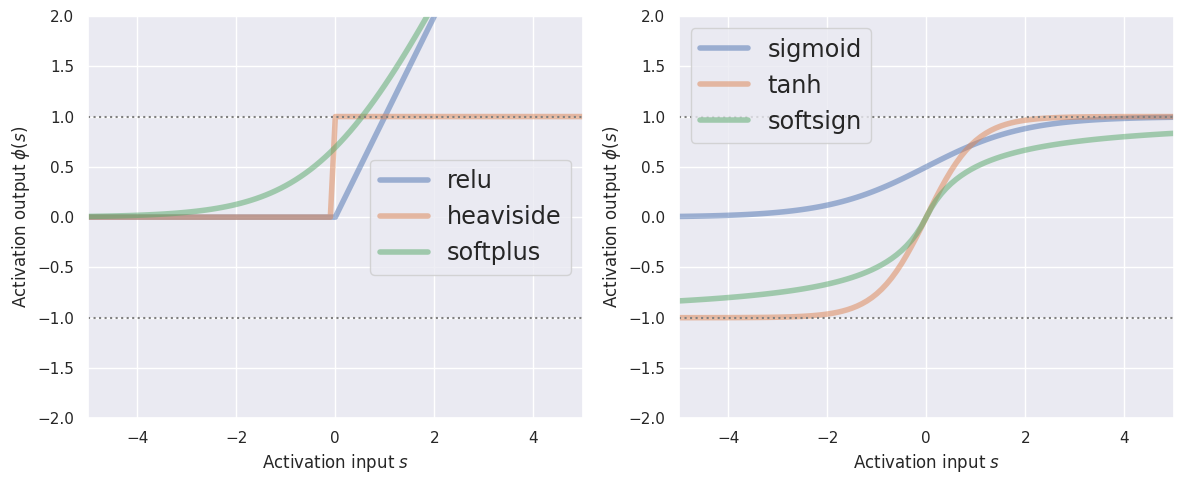

In [ ]:
def plot_activations(ax, names, s_range=5, y_range=2):
    s = np.linspace(-s_range, +s_range, 101)
    for name in names.split(','):
        phi = eval(name)
        ax.plot(s, phi(s), lw=4, alpha=0.5, label=name)
    ax.legend(fontsize='x-large')
    ax.set_xlabel('Activation input $s$')
    ax.set_ylabel('Activation output $\phi(s)$')
    ax.set_xlim(-s_range, +s_range)
    ax.set_ylim(-y_range, +y_range)
    ax.axhline(-1, c='gray', ls=':')
    ax.axhline(+1, c='gray', ls=':')

_, ax = plt.subplots(1, 2, figsize=(12, 5))
plot_activations(ax[0], 'relu,heaviside,softplus')
plot_activations(ax[1], 'sigmoid,tanh,softsign')
plt.tight_layout()

### Below we will show a comparison between Perceptron and Multilayer perceptron to classify linear and non-linear datasets.

In [ ]:
# Create datasets
X1, Y1 = make_classification(n_features=2, n_redundant=0, n_informative=2, n_clusters_per_class=1, class_sep=2.0, n_samples=300)
X2, Y2 = make_moons(n_samples=200, noise=0.1)

# Function to plot decision boundary
def plot_decision_boundary(model, X, y, ax):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101),
                         np.linspace(y_min, y_max, 101))

    # Get predictions
    ab = np.c_[xx.ravel(), yy.ravel()]
    pred = model.predict(ab)

    # If binary classification, no need to take argmax
    if pred.shape[1] > 1:
        cc = np.argmax(pred, axis=1).reshape(xx.shape)
    else:
        cc = pred.reshape(xx.shape)

    ax.contourf(xx, yy, cc, cmap='viridis', alpha=0.2)
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolors='k')
    return ax

In [ ]:
# Create single layer perceptron
slp = Sequential()
slp.add(Dense(1, input_shape=(2,), activation='sigmoid'))
slp.compile(optimizer='adam',
            loss=tf.keras.losses.BinaryCrossentropy(),
            metrics=['accuracy'])

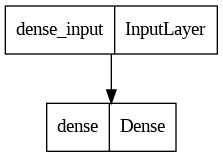

In [ ]:
plot_model(slp)

In [ ]:
# Create multilayer perceptron

mlp = Sequential(name="MLP")
mlp.add(Dense(8, input_shape=(2,), activation='relu'))
mlp.add(Dense(16, activation='relu'))
#mlp.add(Dense(4, activation='relu'))
mlp.add(Dense(1, activation='sigmoid'))
mlp.compile(optimizer='adam',
            loss=tf.keras.losses.BinaryCrossentropy(),
            metrics=['accuracy'])

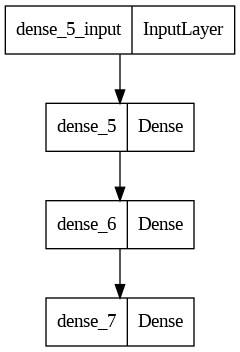

In [ ]:
plot_model(mlp)

# Here we can see how both single layer and multilayer perceptrons will be able to separate this mock data. Also note that MLP might be a bit overkill for simple models.

319/319 [==============================] - 1s 4ms/step


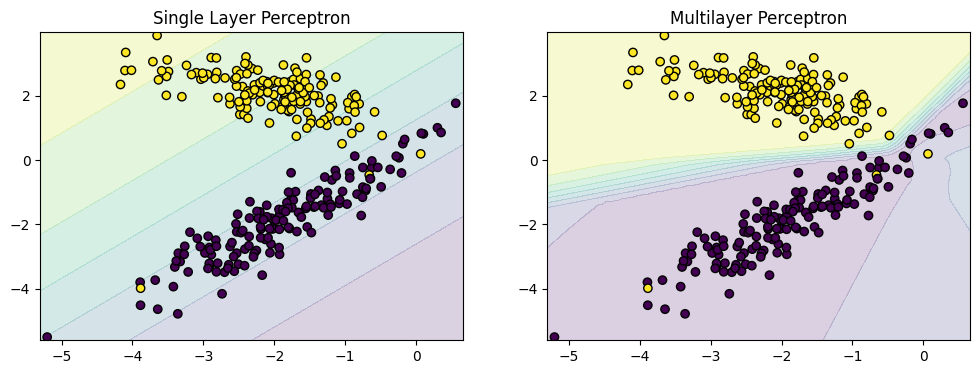

In [ ]:
# Plot for linearly separable data
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
slp.fit(X1, Y1, epochs=100, verbose=0)
ax[0].set_title('Single Layer Perceptron')
plot_decision_boundary(slp, X1, Y1, ax[0])


mlp.fit(X1, Y1, epochs=100, verbose=0)
ax[1].set_title('Multilayer Perceptron')
plot_decision_boundary(mlp, X1, Y1, ax[1])

plt.show()

# Here is a more tricky case that causes trouble for our single layer friend. See how we need a more complex solution to handle the non-linearity of our dataset.

# Try to change the structure of our MLP model, how does it affect our results? What about different activation functions?

319/319 [==============================] - 0s 1ms/step


<Axes: title={'center': 'Multilayer Perceptron'}>

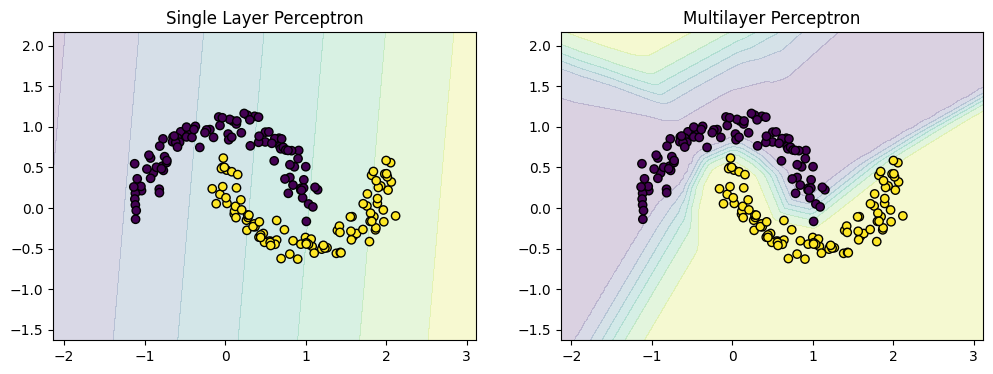

In [ ]:
# Plot for non-linearly separable data
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
slp.fit(X2, Y2, epochs=100, verbose=0)
ax[0].set_title('Single Layer Perceptron')
plot_decision_boundary(slp, X2, Y2, ax[0])

mlp.fit(X2, Y2, epochs=100, verbose=0)
ax[1].set_title('Multilayer Perceptron')
plot_decision_boundary(mlp, X2, Y2, ax[1])

In [ ]:
# Load the Iris dataset
iris_data = load_iris()
X_iris, Y_iris = iris_data.data, iris_data.target
encoder = OneHotEncoder(sparse=False)
Y_iris_one_hot = encoder.fit_transform(Y_iris.reshape(-1, 1))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
# Create multilayer perceptron model
def create_multilayer_perceptron(input_shape, output_shape):
    model = Sequential()
    model.add(Dense(16, input_shape=(input_shape,), activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(4, activation='relu'))
    model.add(Dense(output_shape, activation='softmax' if output_shape > 1 else 'sigmoid'))
    model.compile(Adam(), 'sparse_categorical_crossentropy' if output_shape > 1 else 'binary_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
iris = load_iris()
X_iris = iris.data[:, :2]  # using only the first two features for visualization
Y_iris = iris.target

# Train model on the Iris dataset
iris_model = create_multilayer_perceptron(2,3)  # 2 features, 3 classes
iris_model.fit(X_iris, Y_iris, epochs=200, verbose=0)

In [ ]:
# Evaluate the model on the Iris dataset
loss, accuracy = iris_model.evaluate(X_iris, Y_iris)
print(f'Iris Dataset - Loss: {loss:.4f}, Accuracy: {accuracy:.4f}')

5/5 [==============================] - 0s 4ms/step - loss: 0.4880 - accuracy: 0.7200
Iris Dataset - Loss: 0.4880, Accuracy: 0.7200


319/319 [==============================] - 1s 2ms/step


<Axes: title={'center': 'Multilayer Perceptron - Iris Dataset'}>

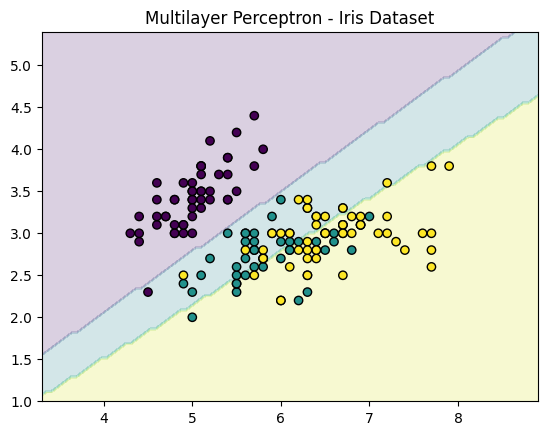

In [ ]:
fig, ax = plt.subplots()
ax.set_title('Multilayer Perceptron - Iris Dataset')
plot_decision_boundary(iris_model, X_iris, Y_iris, ax)